# Datenset der Seattle Library Inventory
In diesem Jupyter Notebook sollen die Inventory Daten aus dem Jahr 2018 der Bibliothek betrachtet werden. Dabei werden folgende Fragen bearbeitet und die Ergebnisse Präsentiert:

-Wie verteilt sich der Bestand auf die entsprechenden Standorte 
- 


Die Daten werden dabei über einen Befehl von der Seite der data.seattle.gov heruntergeladen und in einer csv Datei lokal auf dem Computer gespeichert der das Jupyter Notebook ausführt.

In [1]:
# Zunächst werden zusätzliche Bibliotheken importiert um den Umfang der Python Befehle zu erweitern:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Variabeln für den Download und speichern der Daten
url = "https://data.seattle.gov/resource/6vkj-f5xf.csv?$limit=2665099"
inventory_file = "inventorySL2018.csv"

In [5]:
# Download der Daten, dafür wird die importierte Bibliothek urllib.request benutzt:
urllib.request.urlretrieve(url, inventory_file)

('inventorySL2018.csv', <http.client.HTTPMessage at 0x2308d0a5a08>)

In [6]:
# Variable für das lesen der co_file mit hilfe der Panda Bibliothek:
inventory = pd.read_csv(inventory_file)

In [7]:
# Über die Erstellte Variable checkout kann nun teile der csv Datei angezeigt werden: 
inventory

,bibnum,title,author,isbn,publicationyear,publisher,subjects,itemtype,itemcollection,floatingitem,itemlocation,reportdate,itemcount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,2017-09-01T00:00:00.000,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,2017-09-01T00:00:00.000,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,2017-09-01T00:00:00.000,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,2017-09-01T00:00:00.000,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,2017-09-01T00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665094,1292605,Owl babies / written by Martin Waddell ; illus...,"Waddell, Martin",1564021017,c1992.,"Candlewick Press,","Owls Juvenile fiction, Mother and child Juveni...",jcbk,ncpic,NaN,bro,2017-10-01T00:00:00.000,1
2665095,3052233,The happy sleeper : the science-backed guide t...,"Turgeon, Heather.","0399166025, 9780399166020",c2014.,"Jeremy P. Tarcher/Penguin,","Infants Sleep, Children Sleep, Child rearing",acbk,nanf,NaN,col,2017-10-01T00:00:00.000,1
2665096,3111622,Fearless / Elliott James.,"James, Elliott","0316253448, 9780316253444",2015.,"Orbit,",Fantasy fiction,acbk,cafic,NaN,cen,2017-10-01T00:00:00.000,1
2665097,3197669,"Is that wise, Pig? / by Jan Thomas.","Thomas, Jan, 1958-","1416985824, 9781416985822",[2016],"Beach Lane Books,","Domestic animals Juvenile fiction, Swine Juven...",jcbk,ncpic,NaN,qna,2017-10-01T00:00:00.000,1


## Frage 4: Wie verteilt sich der Bestand auf die entsprechenden Standorte?

In [11]:
# Wir betrachten für diese Frage nur die Spalte "itemlocation"
inventory[["itemlocation"]]

,itemlocation
0,qna
1,lcy
2,bea
3,cen
4,cen
...,...
2665094,bro
2665095,col
2665096,cen
2665097,qna


In [26]:
# Mit dem Befehl value_counts können wir die häufigkeit der Werte zählen und erhalten so die Anzahl der Medien pro Standort:
inventory.itemlocation.value_counts()

cen     1071757
net      122695
bal      109736
gwd      103371
swt      101348
lcy       98965
dth       91476
bro       86298
cap       72237
bea       70119
wts       67557
nga       67424
rbe       65267
col       62953
uni       57151
glk       53287
mag       51270
qna       47527
hip       39151
fre       34254
mon       33564
dlr       32222
spa       31752
nhy       23113
idc       22219
mgm       20479
wal       17482
mob        9285
tcs        1023
GWD         103
drp1         10
out           2
ill           2
Name: itemlocation, dtype: int64

Text(0.5, 0, 'Locations')

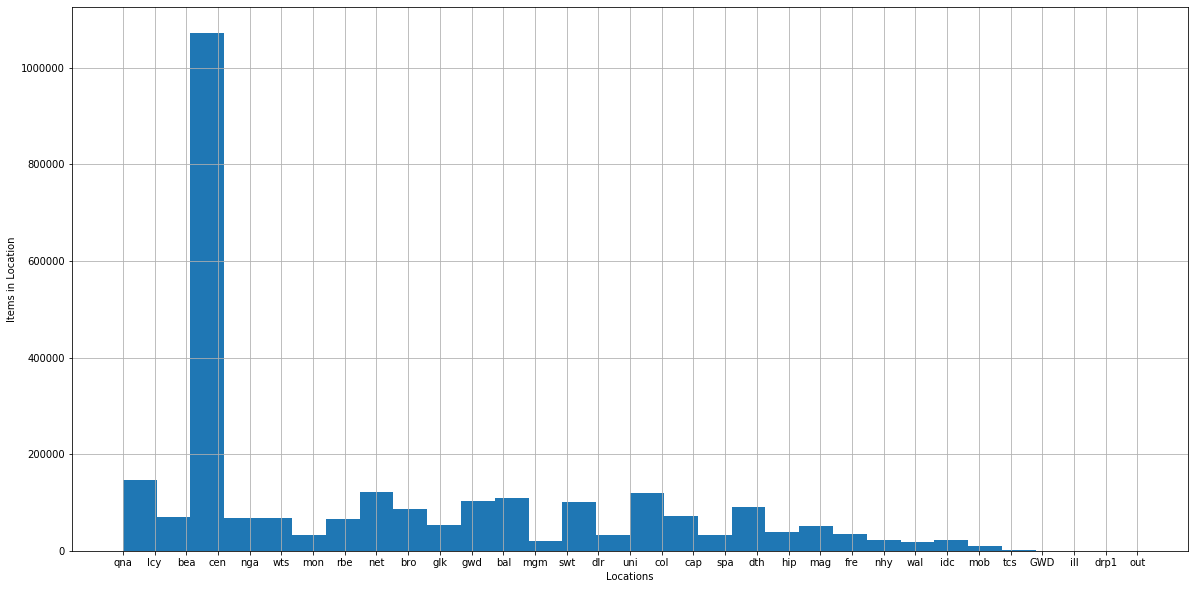

In [53]:
# Dieses Ergebniss können wir in einem Histogramm darstellen:
inventory["itemlocation"].hist(bins=30, figsize=[20,10])
plt.ylabel('Items in Location')
plt.xlabel('Locations')

## Frage 5: Wie hoch ist die Anzahl an floating itmes im Gesamtsystem?

In [73]:
floa = inventory[["floatingitem"]]
floa

,floatingitem
0,Floating
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2665094,NaN
2665095,NaN
2665096,NaN
2665097,NaN


In [98]:
# Als erstes werden die Zeilen in der Spalte "floatingitem" gezählt, dadurch erhalten wir die gesamt Anzahl an Medien:
index = floa.index
number_of_rows = len(index)
print(number_of_rows)

2665099


In [104]:
# Über diese Abfrage wird gezählt wie viele Medien in der Spalte "floatingitem" den Wert "Floating" haben
# und in die Variable "floatingnumber" gespeichert:
floatingnumber = inventory.floatingitem.value_counts ()
floatingnumber

Floating    407767
Name: floatingitem, dtype: int64

In [99]:
# Um auf die Anzahl an nicht Floating Medien zu kommen werden die Anzahl an Zeilen von dem Wert aus "floatingnumber" abgezogen:
nofloating = (number_of_rows - floatingnumber)
nofloating

Floating    2257332
Name: floatingitem, dtype: int64

D:\Anaconda_3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


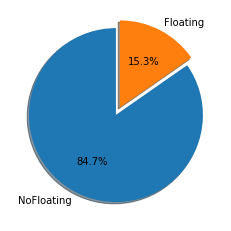

In [100]:
# Diese Werte werden als sizes in das Kuchen-Diagramm übernommen:
labels = 'NoFloating', 'Floating'
sizes = [nofloating,floatingnumber]
explode = (0, 0.1,)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()